In [2]:
import dataWrangler as dw
import models as md
from matplotlib import pyplot as plt
import numpy as np

In [11]:
test_list = []

# open file and read the content in a list
with open("../../data/test.txt", 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1] # remove linebreak which is the last character of the string
        test_list.append(currentPlace) # add item to the list

test_gen = dw.DataGenerator(folder="../../data",batch_size=1, file_list=test_list, shuffle=False)
test_gen.__getitem__(0)

model = md.unet2D(input_size = (512,512,4))

model.load_weights("../../modelmodel_010-1.1204.h5")

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 4) 0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 512, 512, 32) 1184        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 512, 512, 32) 128         conv2d_46[0][0]                  
__________________________________________________________________________________________________
activation_44 (Activation)      (None, 512, 512, 32) 0           batch_normalization_44[0][0]     
____________________________________________________________________________________________

In [34]:
X,y = test_gen.__getitem__(2)
y_pred = model.predict(test_gen.__getitem__(2))

In [14]:
y_pred.shape

(2, 512, 512, 1)

Text(0.5, 1.0, 'Actual Segment')

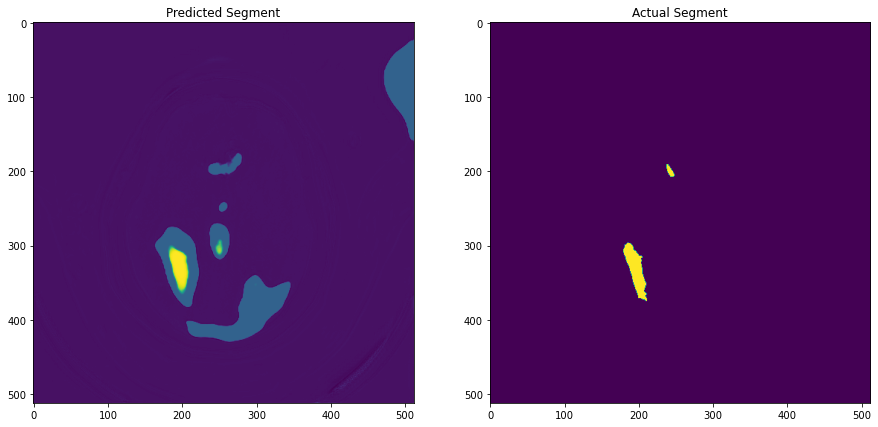

In [35]:
f, ax = plt.subplots(1,2, figsize = [15,15])

ax[0].imshow(y_pred[0,:,:,0])
ax[0].set_title("Predicted Segment")
ax[1].imshow(y[0,:,:,0])
ax[1].set_title("Actual Segment")

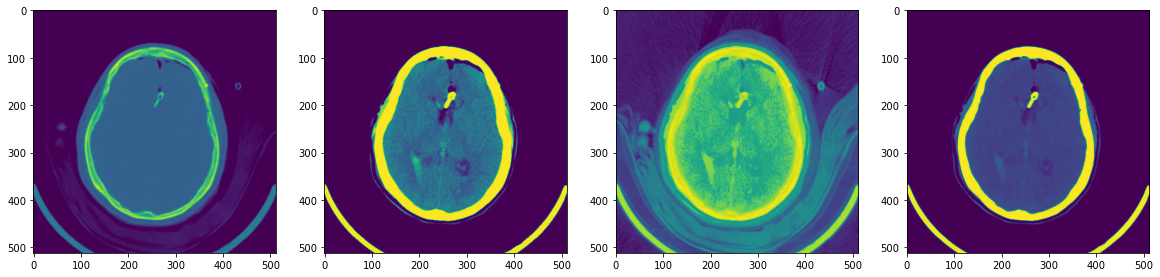

In [36]:
f, ax = plt.subplots(1,4, figsize = [20,15])

for i in range(4):
    ax[i].imshow(X[0,:,:,i])

Upload to google drive:

https://help.talend.com/reader/Ovc10QFckCdvYbzxTECexA/EoAKa_oFqZFXH0aE0wNbHQ

https://gist.github.com/tanaikech/8cdfd23807372657dc63d81e25e35153

In [42]:
import json
import requests
headers = {"Authorization": "Bearer ### access token ###"}
para = {
    "name": "sample.png",
    "parents": ["### folder ID ###"]
}
files = {
    'data': ('metadata', json.dumps(para), 'application/json; charset=UTF-8'),
    'file': open("./sample.png", "rb")
}
r = requests.post(
    "https://www.googleapis.com/upload/drive/v3/files?uploadType=multipart",
    headers=headers,
    files=files
)
print(r.text)

FileNotFoundError: [Errno 2] No such file or directory: './sample.png'